In [1]:
import numpy as np
import imageio.v2 as imageio
import matplotlib.pyplot as plt

In [154]:
img1 = imageio.imread('images/pencils2.png')
img2= imageio.imread('images/mountain.jpg')
img3= imageio.imread('images/pencils.png')
# img4 = imageio.imread('images/rain.jpg')   here to test euclidean distance via luminance

In [142]:
def normal(doe):
    
    #the simple normalization function
    #SOS! not the same with min_max_norm function which is bellow
    
    result = np.zeros_like(doe)
    
    result = 255*doe/np.sum(doe+1)
    
    return result

In [4]:
def euclidean_dist(q,p):
          
    result =  np.linalg.norm(q-p)
    
    return result

In [95]:
# histogramm for 2 canal images(grayscale)

def histogram(A, no_levels):
    N, M = A.shape # NxM image/matrix --> img may not be square
    hist = np.zeros(no_levels).astype(int) #bucket
    for i in range(no_levels):
        pixel_value_i = np.sum(A==i)
        hist[i] = pixel_value_i
        
    return normal(hist)

In [143]:
def color_hist(image,bins):
    # "break" the rgb image to red , green and blue
    
    red_c = image[:,:,0]  
    green_c = image[:,:,1]
    blue_c = image[:,:,2]
    
    hist = np.zeros_like(bins).astype(int)
    
    #calculate each channels histogramm
    
    pix_val_r = histogram(red_c,bins)
    pix_val_g = histogram(green_c,bins)
    pix_val_b = histogram(blue_c,bins)
    
    hist = np.concatenate((pix_val_r,pix_val_g,pix_val_b) , axis=None)
    
    return hist

In [135]:
hist_img1 = color_hist(img1, 16)
hist_img2 = color_hist(img2, 16)
hist_img3 = color_hist(img3, 16)

Text(0, 0.5, 'Frequency')

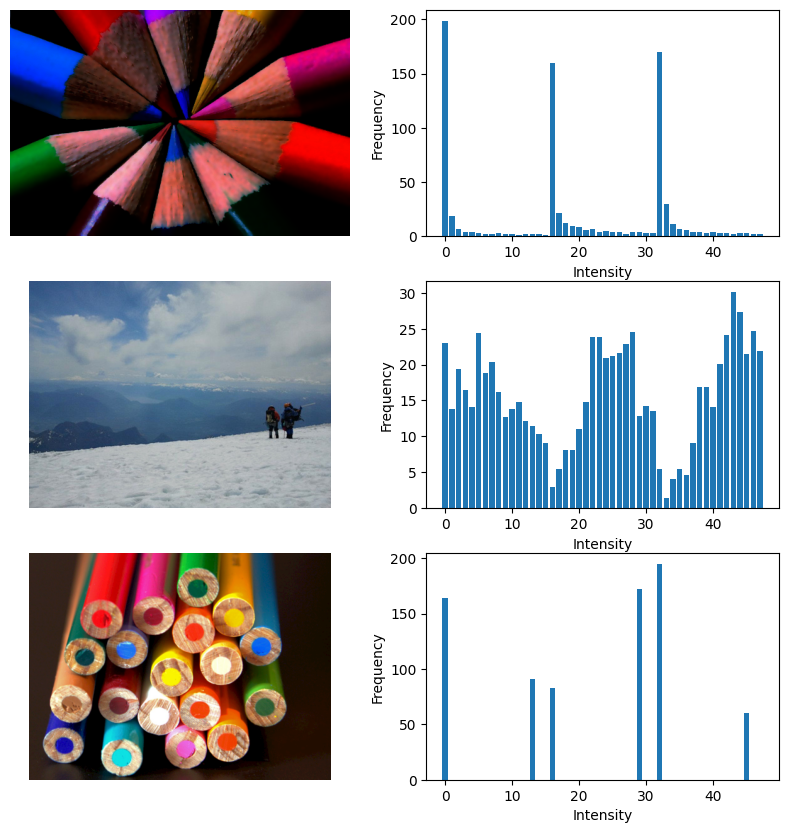

In [136]:
plt.figure(figsize=(10,10))
plt.subplot(321)
plt.imshow(img1)
plt.axis('off')
plt.subplot(322)
plt.bar(range(3*16), hist_img1)
plt.xlabel('Intensity')
plt.ylabel('Frequency')

plt.subplot(323)
plt.imshow(img2, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.subplot(324)
plt.bar(range(3*16), hist_img2)
plt.xlabel('Intensity')
plt.ylabel('Frequency')

plt.subplot(325)
plt.imshow(img3, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.subplot(326)
plt.bar(range(3*16), hist_img3)
plt.xlabel('Intensity')
plt.ylabel('Frequency')

In [144]:
def min_max_norm(mat):    
    result = (mat-mat.min())/(mat.max()- mat.min())
    
    return result

In [145]:
def luminance(image):
    # Calculating the luminance using : channel_0*0.299 + channel_1*0.587 + channel_2*0.114
    
    
    backup_r = image[:,:,0]
    backup_g = image[:,:,1]
    backup_b = image[:,:,2]

    
    lum = backup_r*0.299 + backup_g*0.587 + backup_b*0.114
    
    
    fin = min_max_norm(lum)
    
    return fin

In [169]:
lum1 = luminance(img1)
lum2 = luminance(img2)
lum3 = luminance(img3)
#lum4 = luminance(img4)

In [170]:
hist_lum1 = histogram(lum1,16)
hist_lum2 = histogram(lum2,16)
hist_lum3 = histogram(lum3,16)
#hist_lum4 = histogram(lum4,16)

Text(0, 0.5, 'Frequency')

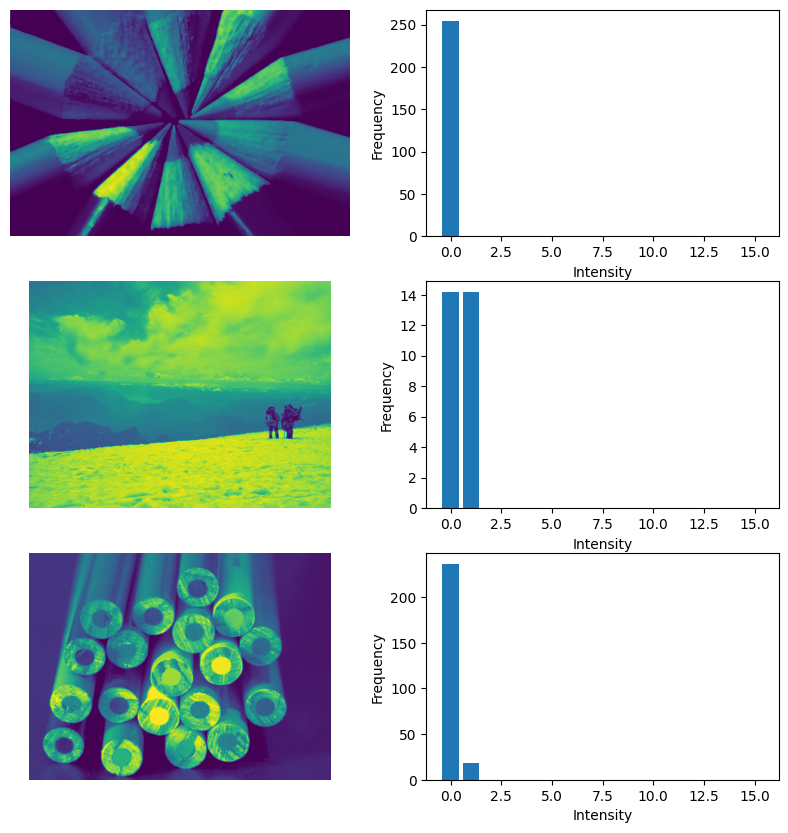

In [171]:
plt.figure(figsize=(10,10))
plt.subplot(321)
plt.imshow(lum1)
plt.axis('off')
plt.subplot(322)
plt.bar(range(16), hist_lum1)
plt.xlabel('Intensity')
plt.ylabel('Frequency')

plt.subplot(323)
plt.imshow(lum2)
plt.axis('off')
plt.subplot(324)
plt.bar(range(16), hist_lum2)
plt.xlabel('Intensity')
plt.ylabel('Frequency')

plt.subplot(325)
plt.imshow(lum3)
plt.axis('off')
plt.subplot(326)
plt.bar(range(16), hist_lum3)
plt.xlabel('Intensity')
plt.ylabel('Frequency')

In [172]:
eucl_dist12 = euclidean_dist(hist_img1,hist_img2)
eucl_dist13 = euclidean_dist(hist_img1,hist_img3)
eucl_dist23 = euclidean_dist(hist_img2,hist_img3)

In [173]:
print('Euclidean Distance bt 1&2:' ,  eucl_dist12
      ,'\nEuclidean Distance bt 1&3:' ,  eucl_dist13
      ,'\nEuclidean Distance bt 2&3:' ,  eucl_dist23)

Euclidean Distance bt 1&2: 304.56874890355147 
Euclidean Distance bt 1&3: 223.26845613421978 
Euclidean Distance bt 2&3: 328.6316896397757


In [174]:
# The euclidean distance helps us check the similarity , between two images
# As we see from the above the distance between 1 et 3 (eucl_dist13) is less than the distance of images 1 et 2 and 2 et 3
# So the logical conclusion is that img3 is more similar to img1  (more likely to represent pencils , than mountains!) 



In [175]:
lum_eucl_dist12 = euclidean_dist(hist_lum1,hist_lum2)
lum_eucl_dist13 = euclidean_dist(hist_lum1,hist_lum3)
lum_eucl_dist23 = euclidean_dist(hist_lum2,hist_lum3)
#lum_eucl_dist34 = euclidean_dist(hist_lum3,hist_lum4)

In [176]:
print('Luminance Euclidean Distance bt 1&2:' ,  lum_eucl_dist12
      ,'\nLuminance Euclidean Distance bt 1&3:' ,  lum_eucl_dist13
      ,'\nLuminance Euclidean Distance bt 2&3:' ,  lum_eucl_dist23)

Luminance Euclidean Distance bt 1&2: 241.09530626337906 
Luminance Euclidean Distance bt 1&3: 26.059022874354802 
Luminance Euclidean Distance bt 2&3: 222.12777026654123


In [178]:
# The euclidean distance ,between 2 images via Luminance, is another metric for finding similarities
# and as we see again the luminance euclidean distance between 1 et 3 is the minimum , which means that img3 is similar to img1
# ( Again we are not sure if the images are depicting the same thing here. Take as example img4 (a rainbow) , which is "close"
# both to img1 and img3 , whilst not beaing a pencil)
# 